In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
WORK_DIR = 'C:\\Users\\dell\\Documents\\VIT\\6th_Semester\\Medical_Image_Analysis_CSE3042\\Project\\Alzheimer_s_Dataset\\dataset_reduced_unsharp\\'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 227
IMAGE_SIZE = [227, 227]
DIM = (IMG_SIZE, IMG_SIZE)

In [3]:
train_data_gen = tf.keras.utils.image_dataset_from_directory(WORK_DIR, labels='inferred', image_size=(227,227), batch_size=5121, shuffle=True)

Found 701 files belonging to 4 classes.


In [4]:
for images, labels in train_data_gen.take(1):
    train_images = images.numpy()
    train_labels = labels.numpy()

In [5]:
train_images.shape

(701, 227, 227, 3)

In [6]:
train_labels

array([2, 3, 2, 3, 2, 2, 2, 0, 2, 3, 3, 0, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3,
       3, 0, 2, 2, 3, 3, 0, 3, 3, 3, 2, 0, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       3, 3, 0, 2, 2, 3, 3, 3, 3, 0, 2, 3, 0, 2, 2, 2, 3, 3, 2, 2, 0, 3,
       0, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 0, 0, 2, 3, 3,
       3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 3, 2, 3, 3, 0, 2, 3,
       2, 3, 3, 2, 2, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 1, 3, 2, 0, 2, 0, 3,
       0, 2, 3, 3, 3, 1, 2, 2, 3, 2, 2, 0, 3, 2, 0, 3, 0, 2, 2, 2, 2, 2,
       0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 0, 2, 2, 2,
       2, 2, 3, 2, 2, 0, 2, 2, 3, 0, 0, 3, 2, 2, 2, 2, 0, 2, 3, 2, 2, 3,
       2, 3, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 3, 0, 3, 2, 0, 2, 2, 3, 3, 0,
       3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 0, 3, 3, 2, 2, 2, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 3, 3,

In [7]:
train_labels.shape

(701,)

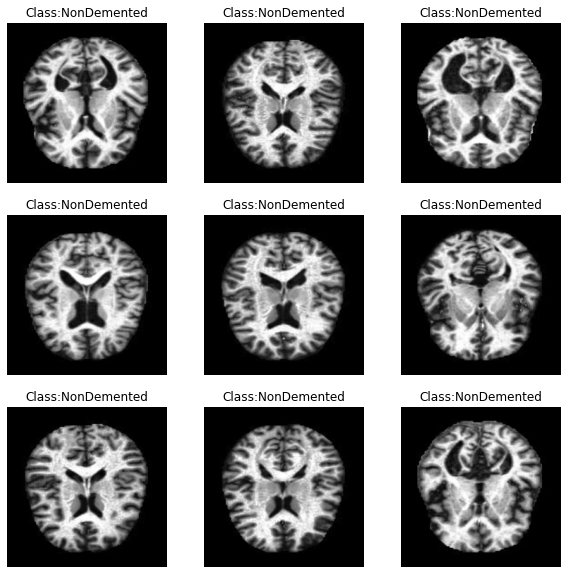

In [8]:
import random as rd
def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    # """
    
    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))
    
    # # get a batch of images
    # x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        idx = rd.randint(0, 701)
        plt.imshow(train_images[idx].astype('uint8'))
        plt.axis("off")
        plt.title("Class:{}".format(labels[np.argmax(train_labels[idx])]))

# Display Train Images
show_images(train_data_gen)

In [ ]:
pd.value_counts(train_labels).plot.bar()

In [9]:
#Performing over-sampling of the data, since the classes are imbalanced
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
train_images, train_labels = sm.fit_resample(train_images.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)
train_images = train_images.reshape(-1, IMG_SIZE, IMG_SIZE,3)
    # train_labels = train_labels.reshape(-1, 4)
print(train_images.shape, train_labels.shape)

(1400, 227, 227, 3) (1400,)


## Train, Test and Validation Split

In [11]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, train_size = 0.8, random_state=42 )

### CNN (AlexNet)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
alexNet = Sequential()
alexNet.add(Conv2D(96, kernel_size=11, strides=4, input_shape = (227,227,3), activation='relu'))
alexNet.add(MaxPooling2D(pool_size = 3, strides=2))
alexNet.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
alexNet.add(Conv2D(256, kernel_size=5, strides=1, padding="same", activation='relu'))
alexNet.add(MaxPooling2D(pool_size = 3, strides=2))
alexNet.add(Conv2D(384, kernel_size=3, strides=1, padding="same", activation='relu'))
alexNet.add(Conv2D(384, kernel_size=3, strides=1, padding="same", activation='relu'))
alexNet.add(Conv2D(256, kernel_size=3, strides=1, padding="same", activation='relu'))
alexNet.add(MaxPooling2D(pool_size = 3, strides=2))
alexNet.add(Dropout(0.5))
alexNet.add(Flatten())
alexNet.add(Dense(4096, activation='relu'))
alexNet.add(Dropout(0.5))
alexNet.add(Dense(4096))
alexNet.add(Dense(4, activation='softmax'))
alexNet.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [13]:
alexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 zero_padding2d (ZeroPadding  (None, 31, 31, 96)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                        

In [14]:
train_labels.shape

(1120,)

In [15]:
train_labels

array([1, 3, 3, ..., 1, 0, 1])

In [16]:
alexNet.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
35/35 [==============================] - 231s 6s/step - loss: 201.6621 - accuracy: 0.2723 - val_loss: 1.4046 - val_accuracy: 0.2321
Epoch 2/5
35/35 [==============================] - 213s 6s/step - loss: 1.3690 - accuracy: 0.2634 - val_loss: 1.2733 - val_accuracy: 0.4214
Epoch 3/5
35/35 [==============================] - 261s 7s/step - loss: 1.3908 - accuracy: 0.2571 - val_loss: 1.3917 - val_accuracy: 0.2321
Epoch 4/5
35/35 [==============================] - 244s 7s/step - loss: 1.3915 - accuracy: 0.2455 - val_loss: 1.3874 - val_accuracy: 0.2214
Epoch 5/5
35/35 [==============================] - 247s 7s/step - loss: 1.3919 - accuracy: 0.2652 - val_loss: 1.3841 - val_accuracy: 0.2571


### Transfer Learning

### VGG19

In [17]:
from tensorflow.keras.applications import VGG19

In [22]:
vgg19_model = keras.models.Sequential()
vgg19_model.add(keras.layers.Input(shape=(227,227,3)))
layer1 = VGG19(include_top=False, weights='imagenet')
layer1.trainable = False
vgg19_model.add(layer1)
vgg19_model.add(keras.layers.Flatten())
vgg19_model.add(keras.layers.Dense(4))
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 20,124,740
Trainable params: 100,356
Non-trainable params: 20,024,384
_________________________________________________________________


In [23]:
vgg19_model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [24]:
train_images.shape

(1120, 227, 227, 3)

In [25]:
train_labels.shape

(1120,)

In [26]:
vgg19 = vgg19_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
 8/35 [=====>........................] - ETA: 3:30 - loss: 1.9953 - accuracy: 0.2812

## ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet50_model = keras.models.Sequential()
resnet50_model.add(keras.layers.Input(shape=(227,227,3)))
layer1 = ResNet50(include_top=False, weights='imagenet')
layer1.trainable = False
resnet50_model.add(layer1)
resnet50_model.add(keras.layers.Flatten())
resnet50_model.add(keras.layers.Dense(4))
resnet50_model.summary()

94765736/94765736 [==============================] - 18s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 524292    
                                                                 
Total params: 24,112,004
Trainable params: 524,292
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet50_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
resnet50 = resnet50_model.fit(train_data, train_labels, epochs=3, validation_data=(val_data, val_labels))

Epoch 1/3
178/320 [===============>..............] - ETA: 5:51 - loss: 8.0228 - accuracy: 0.2500

KeyboardInterrupt: 